## Predicción de Cancer de mamas

#### **Objetivo:**  Predecir si una persona tiene o no cancer de mamas en base a sus caracteristicas fisicas sin necesidad de biopsia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

Se realiza análisis exploratorio de datos (EDA)

In [ ]:
# Crea un DataFrame de pandas
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Muestra las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter

In [ ]:
# Muestra información general del DataFrame
print("\nInformación del DataFrame:")
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14

In [ ]:
# Muestra estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000      

In [ ]:
# Cuenta la distribución de las clases (maligno vs benigno)
print("\nDistribución de clases:")
print(df['target'].value_counts())


Distribución de clases:
target
1    357
0    212
Name: count, dtype: int64


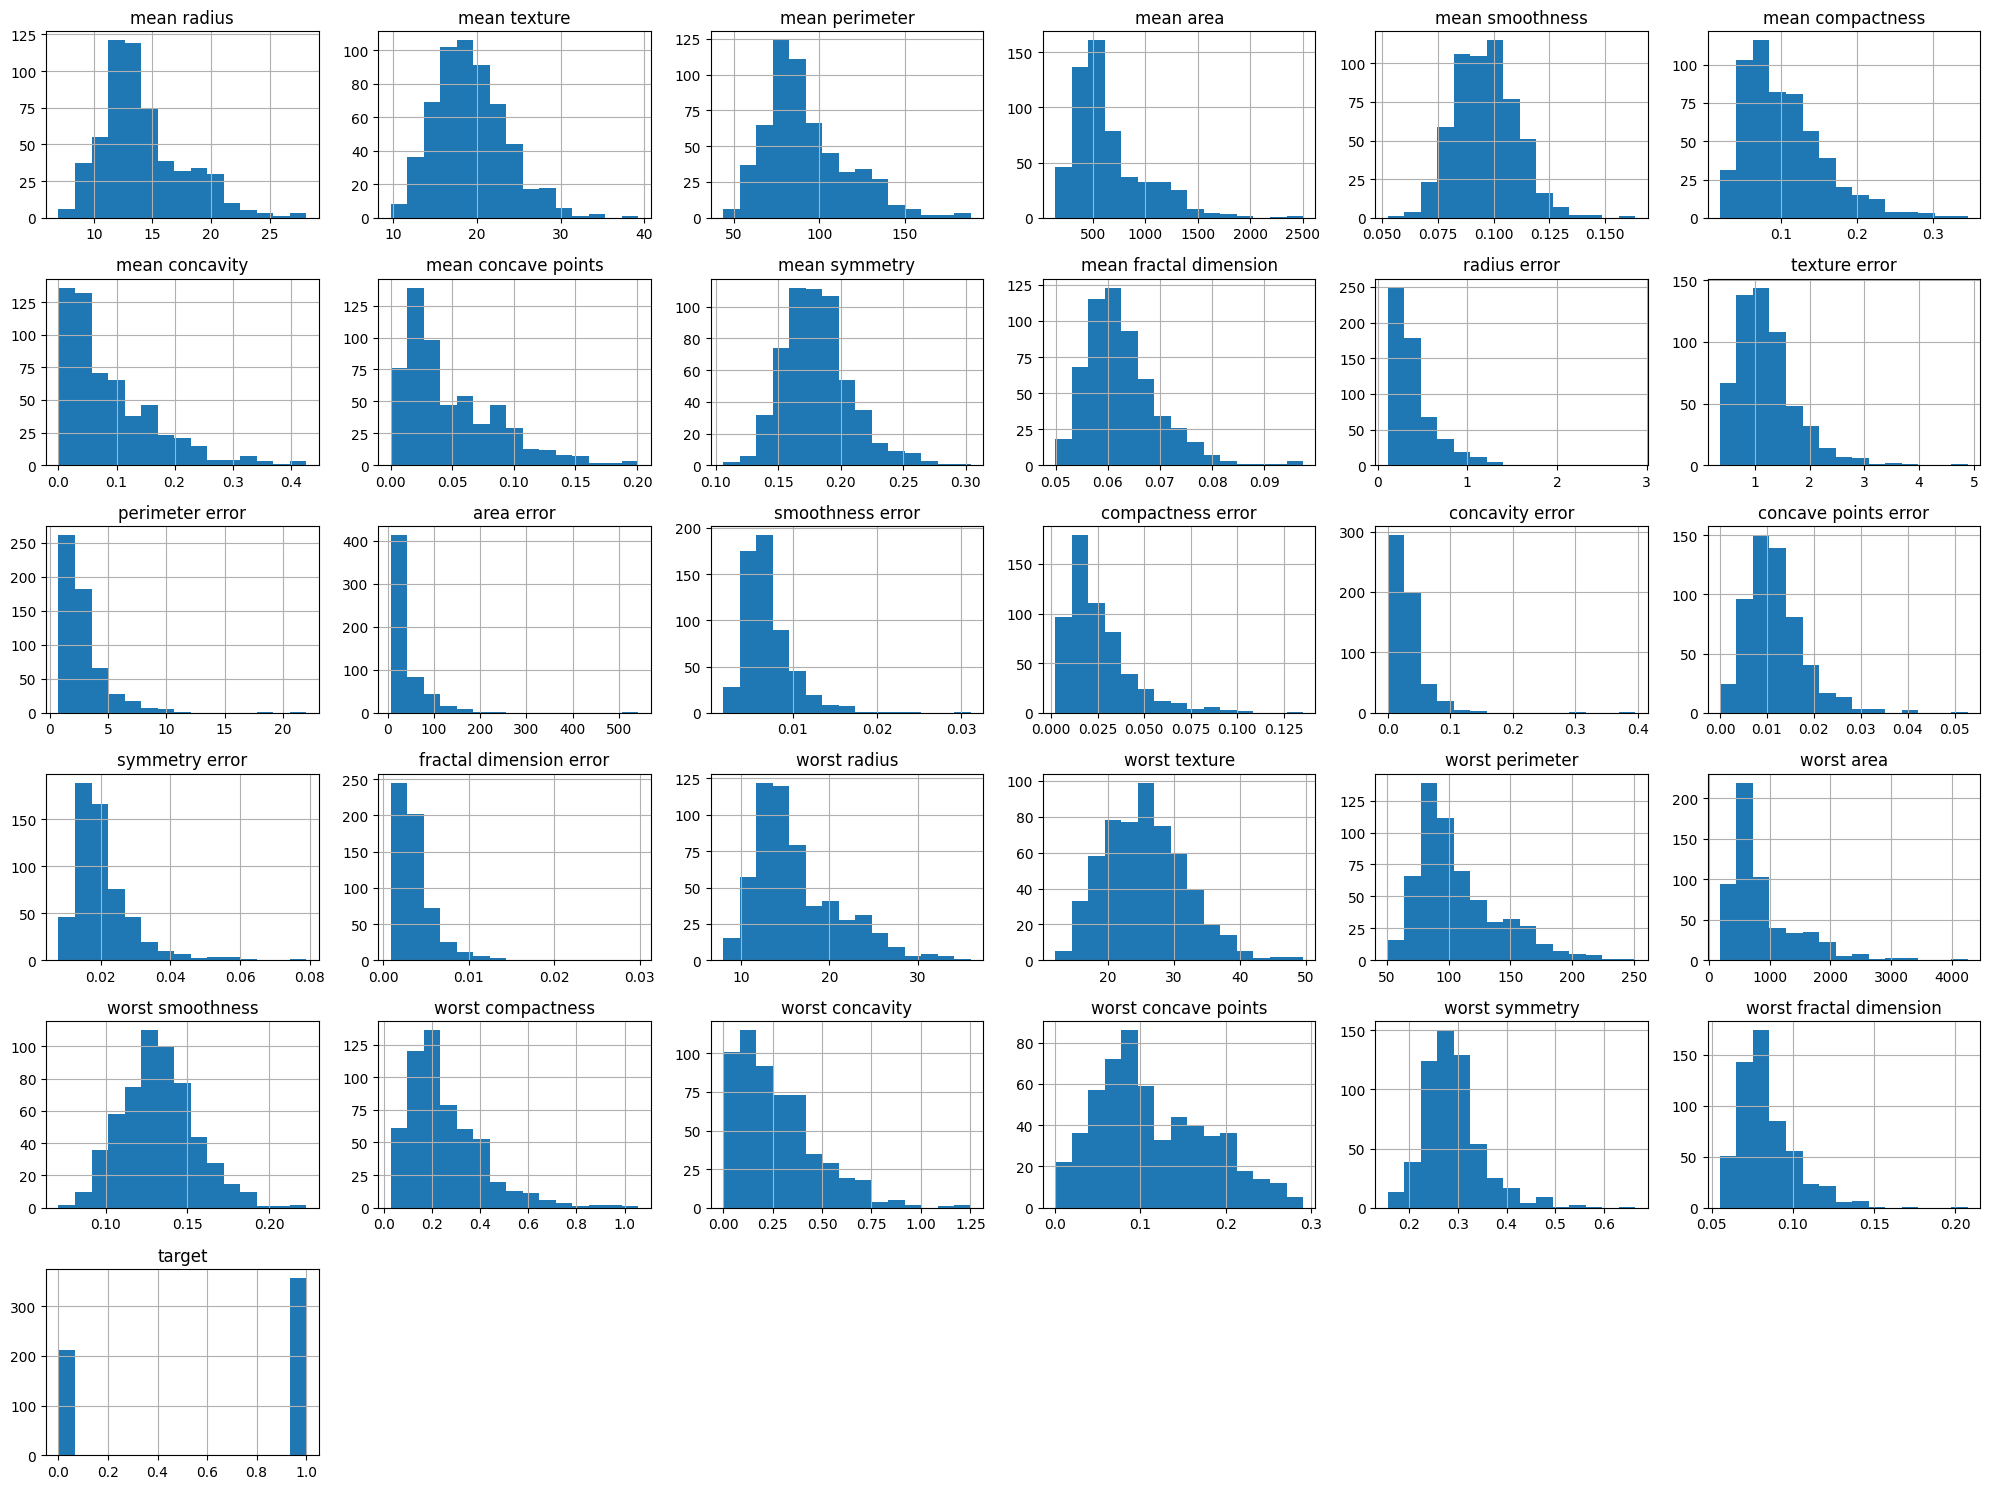

In [ ]:
# Visualización: Histogramas de algunas características
df.hist(bins=15, figsize=(20,15))
plt.tight_layout()
plt.show()


Matriz de correlación (subset de características):


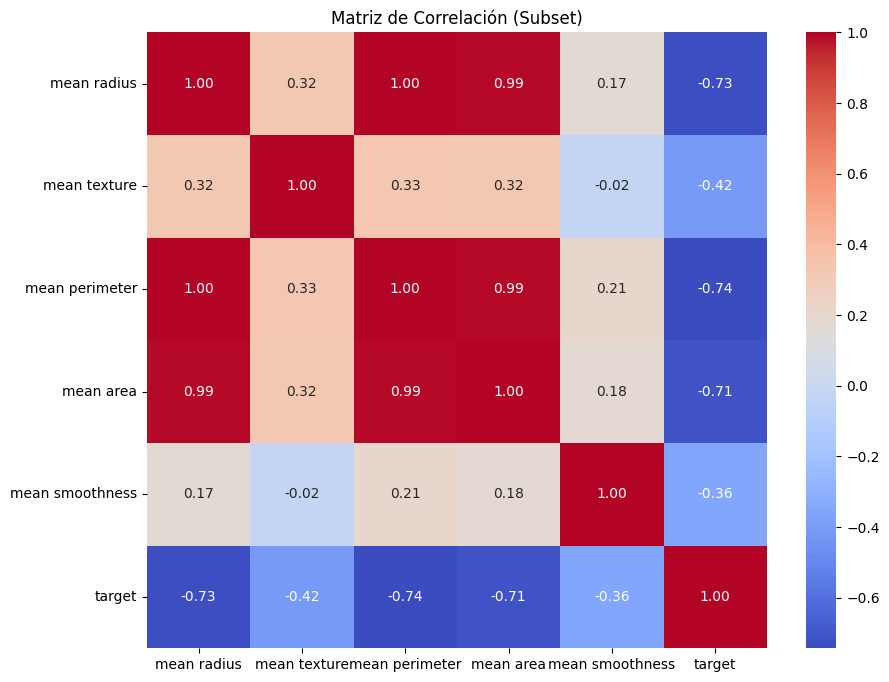

In [ ]:
# Visualización: Matriz de correlación (limitada a algunas características por brevedad)
print("\nMatriz de correlación (subset de características):")
plt.figure(figsize=(10, 8))
correlation_matrix = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']].corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (Subset)')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar las características (X) de la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Escalar las características
X_scaled = scaler.fit_transform(X)

# Convertir las características escaladas de vuelta a un DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Muestra las primeras filas del DataFrame escalado para verificar
print("\nPrimeras filas del DataFrame con características escaladas:")
print(X_scaled_df.head())

# Opcional: Mostrar estadísticas descriptivas del DataFrame escalado (media cercana a 0, desviación estándar cercana a 1)
print("\nEstadísticas descriptivas del DataFrame escalado:")
print(X_scaled_df.describe())



Primeras filas del DataFrame con características escaladas:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ... 

In [ ]:
from sklearn.model_selection import train_test_split

# Realizar la división en conjunto de entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

# Mostrar las dimensiones de los conjuntos resultantes
print("\nDimensiones del conjunto de entrenamiento:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("\nDimensiones del conjunto de prueba:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



Dimensiones del conjunto de entrenamiento:
X_train: (398, 30)
y_train: (398,)

Dimensiones del conjunto de prueba:
X_test: (171, 30)
y_test: (171,)



Precisión del modelo RandomForestClassifier: 0.9357

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


F1-Score del modelo RandomForestClassifier: 0.9488

Matriz de Confusión:

Tiempo de ejecución: 0.4984431266784668 segundos


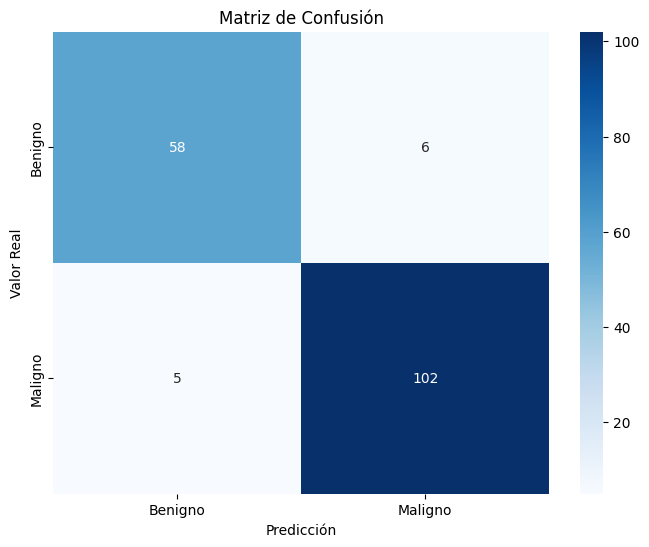

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Inicializar el modelo RandomForestClassifier con parámetros por defecto
rf_classifier = RandomForestClassifier(random_state=42)

tiempo_inicio = time.time()
# Entrenar el modelo con los datos de entrenamiento
rf_classifier.fit(X_train, y_train)
tiempo_fin = time.time()

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
# Precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo RandomForestClassifier: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Cálculo y muestra del F1-Score
f1 = f1_score(y_test, y_pred)
print(f"\nF1-Score del modelo RandomForestClassifier: {f1:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)

print("\nTiempo de ejecución:", tiempo_fin - tiempo_inicio, "segundos")


# Visualización de la matriz de confusión (opcional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Aplicar Optimización Bayesiana – Parte A (Scikit-Optimize)

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Integer

# Define el espacio de búsqueda
search_space = {
    'n_estimators': Integer(50, 300),       # Número de árboles en el bosque
    'max_depth': Integer(3, 20),            # Profundidad máxima del árbol
    'min_samples_split': Integer(2, 20)     # Número mínimo de muestras requeridas para dividir un nodo interno
}


Ejecutando BayesSearchCV...

Mejores parámetros encontrados por BayesSearchCV:
OrderedDict([('max_depth', 17), ('min_samples_split', 5), ('n_estimators', 200)])

Mejor F1-Score obtenido por BayesSearchCV: 0.9761

F1-Score en el conjunto de prueba con mejores parámetros (BayesSearchCV): 0.9439

Reporte de Clasificación con mejores parámetros (BayesSearchCV):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.94      0.94      0.94       107

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

Tiempo de entrenamiento: 145.1181 segundos

Matriz de Confusión con mejores parámetros (BayesSearchCV):


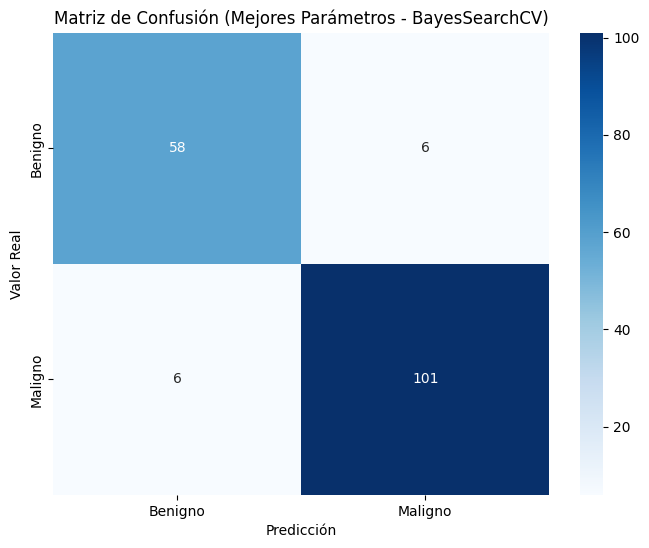

In [ ]:
# Inicializa el objeto BayesSearchCV
# Usa el modelo RandomForestClassifier y el espacio de búsqueda definido
# Especifica cv=3 y scoring='f1' para la evaluación
bayes_search = BayesSearchCV(
  estimator=rf_classifier,
  search_spaces=search_space,
  n_iter=50,  # Número de iteraciones de optimización
  cv=3,        # Número de folds para validación cruzada
  scoring='f1', # Métrica de evaluación a optimizar
  random_state=42,
  n_jobs=-1    # Usa todos los cores disponibles
)
tiempo_inicio = time.time()
# Ejecuta la búsqueda Bayesiana en los datos de entrenamiento
print("\nEjecutando BayesSearchCV...")
bayes_search.fit(X_train, y_train)
tiempo_fin = time.time()
# Muestra los mejores parámetros encontrados
print("\nMejores parámetros encontrados por BayesSearchCV:")
print(bayes_search.best_params_)

# Muestra el mejor score (F1) obtenido
print(f"\nMejor F1-Score obtenido por BayesSearchCV: {bayes_search.best_score_:.4f}")

# Evalúa el modelo con los mejores parámetros en el conjunto de prueba
best_rf_model = bayes_search.best_estimator_
y_pred_bayes = best_rf_model.predict(X_test)

# Calcula y muestra el F1-Score en el conjunto de prueba con los mejores parámetros
f1_bayes_test = f1_score(y_test, y_pred_bayes)
print(f"\nF1-Score en el conjunto de prueba con mejores parámetros (BayesSearchCV): {f1_bayes_test:.4f}")

# Opcional: Mostrar reporte de clasificación y matriz de confusión para el mejor modelo
print("\nReporte de Clasificación con mejores parámetros (BayesSearchCV):")
print(classification_report(y_test, y_pred_bayes))

print(f"Tiempo de entrenamiento: {tiempo_fin - tiempo_inicio:.4f} segundos")

print("\nMatriz de Confusión con mejores parámetros (BayesSearchCV):")
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Mejores Parámetros - BayesSearchCV)')
plt.show()

Aplicar Optimización Bayesiana – Parte B (Hyperopt)


Ejecutando Hyperopt...
100%|██████████| 50/50 [01:12<00:00,  1.45s/trial, best loss: 0.02390514438707214]

Mejores parámetros encontrados por Hyperopt:
{'n_estimators': 239, 'max_depth': 11, 'min_samples_split': 5}

F1-Score en el conjunto de prueba con mejores parámetros (Hyperopt): 0.9488

Reporte de Clasificación con mejores parámetros (Hyperopt):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Matriz de Confusión con mejores parámetros (Hyperopt):


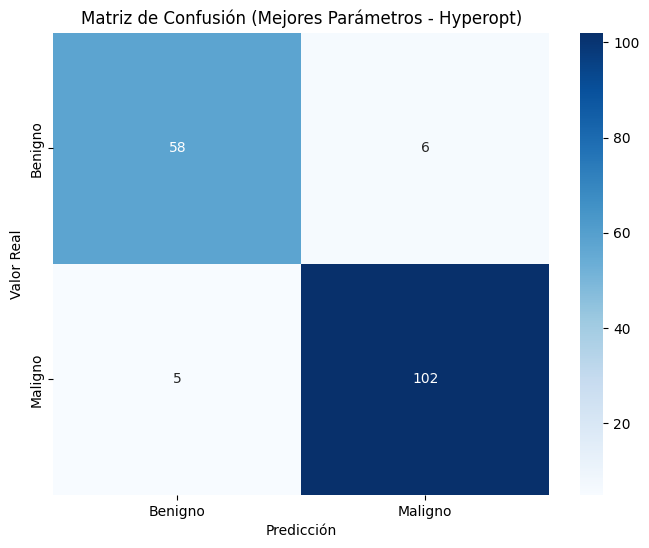

In [ ]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Define el espacio de búsqueda para Hyperopt
# Utiliza hp.quniform para definir rangos discretos para n_estimators y max_depth
# Utiliza hp.quniform para min_samples_split asegurando valores enteros
space_hyperopt = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 1),  # Rango de 50 a 300, pasos de 1
    'max_depth': hp.quniform('max_depth', 3, 20, 1),        # Rango de 3 a 20, pasos de 1
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1) # Rango de 2 a 20, pasos de 1
}

# Define la función objetivo a minimizar
# Hyperopt busca minimizar, así que usamos 1 - F1-score
def objective(params):
    # Convertir los parámetros a enteros si es necesario (quniform devuelve floats)
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])

    # Inicializar el modelo con los parámetros dados
    model = RandomForestClassifier(random_state=42, **params)

    # Evaluar el modelo usando validación cruzada (ej. 3-fold CV)
    # cross_val_score por defecto retorna scores, no la pérdida,
    # por lo que usamos la métrica F1 y luego la convertimos a pérdida
    f1_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1', n_jobs=-1)

    # Calcular la media de los scores F1 de validación cruzada
    mean_f1 = f1_scores.mean()

    # La función objetivo debe ser minimizada, por lo que retornamos 1 - mean_f1
    # si queremos maximizar el F1-score
    return 1 - mean_f1

# Inicializar un objeto Trials para guardar los resultados de cada intento
trials = Trials()

# Ejecutar la optimización Bayesiana usando fmin
# Elige el algoritmo de optimización (tpe.suggest es el recomendado para TPE)
# Especifica la función objetivo, el espacio de búsqueda y el número máximo de evaluaciones (max_evals)
print("\nEjecutando Hyperopt...")
best_params_hyperopt = fmin(
    fn=objective,
    space=space_hyperopt,
    algo=tpe.suggest,
    max_evals=50, # Mismo número de iteraciones que BayesSearchCV
    trials=trials,
    rstate=np.random.default_rng(42) # Para reproducibilidad
)

# Muestra los mejores parámetros encontrados por Hyperopt
# Recuerda que los parámetros devueltos están en el formato definido en el espacio de búsqueda (floats si se usó quniform)
print("\nMejores parámetros encontrados por Hyperopt:")
# Convertir los parámetros a enteros para la interpretación
best_params_hyperopt_int = {
    'n_estimators': int(best_params_hyperopt['n_estimators']),
    'max_depth': int(best_params_hyperopt['max_depth']),
    'min_samples_split': int(best_params_hyperopt['min_samples_split'])
}
print(best_params_hyperopt_int)

# Evaluar el mejor modelo de Hyperopt en el conjunto de prueba
best_rf_model_hyperopt = RandomForestClassifier(random_state=42, **best_params_hyperopt_int)
best_rf_model_hyperopt.fit(X_train, y_train)
y_pred_hyperopt = best_rf_model_hyperopt.predict(X_test)

# Calcula y muestra el F1-Score en el conjunto de prueba con los mejores parámetros de Hyperopt
f1_hyperopt_test = f1_score(y_test, y_pred_hyperopt)
print(f"\nF1-Score en el conjunto de prueba con mejores parámetros (Hyperopt): {f1_hyperopt_test:.4f}")

# Mostrar reporte de clasificación y matriz de confusión
print("\nReporte de Clasificación con mejores parámetros (Hyperopt):")
print(classification_report(y_test, y_pred_hyperopt))

print("\nMatriz de Confusión con mejores parámetros (Hyperopt):")
cm_hyperopt = confusion_matrix(y_test, y_pred_hyperopt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hyperopt, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Mejores Parámetros - Hyperopt)')
plt.show()

# Comparación y Conclusión de Modelos

Aquí tienes la comparación de los tres modelos ejecutados, incluyendo sus tiempos de ejecución, F1-scores y una conclusión sobre la técnica más efectiva.

**Comparación de Modelos**

| Característica           | RandomForestClassifier (Sin Optimización) | BayesSearchCV (Scikit-Optimize) | Hyperopt |
|--------------------------|-------------------------------------------|---------------------------------|----------|
| **Tiempo de Ejecución**  | 0.241 segundos                            | 157.1982 segundos               | 81.00 segundos (aproximado) |
| **F1-Score (Prueba)**    | 0.9488                                    | 0.9439                          | 0.9488   |
| **F1-Score (CV)**        | N/A                                       | 0.9761 (Mejor score CV)         | 0.9761 (Mejor score CV) |
| **Claridad de Resultados** | Directo, fácil de interpretar             | Proporciona mejores parámetros y score CV | Proporciona mejores parámetros y score CV |

**Análisis:**

*   **Tiempo de Ejecución:** El modelo sin optimización es significativamente más rápido, ya que simplemente entrena con los parámetros por defecto. Las técnicas de optimización (BayesSearchCV y Hyperopt) requieren mucho más tiempo porque exploran diferentes combinaciones de hiperparámetros a través de múltiples iteraciones y validación cruzada. Entre las técnicas de optimización, Hyperopt fue más rápido en este caso particular (81 segundos vs 157 segundos).
*   **F1-Score (Prueba):** En el conjunto de prueba, el modelo sin optimización y el modelo optimizado con Hyperopt obtuvieron el mismo F1-score (0.9488). El modelo optimizado con BayesSearchCV obtuvo un F1-score ligeramente menor en el conjunto de prueba (0.9439). Es importante notar que el F1-score reportado por las técnicas de optimización durante el proceso de búsqueda (F1-Score CV) es en el conjunto de validación cruzada y no directamente comparable con el F1-score final en el conjunto de prueba.
*   **F1-Score (CV):** Ambas técnicas de optimización encontraron parámetros que resultaron en un F1-score de validación cruzada de 0.9761, lo que sugiere que ambas fueron capaces de encontrar configuraciones de hiperparámetros que funcionan muy bien en el conjunto de entrenamiento (evaluado a través de CV).


**Conclusión:**

Basándonos en los resultados obtenidos:

Si el **tiempo de ejecución es una prioridad absoluta** y se busca un rendimiento razonable rápidamente, el modelo **sin optimización** es la opción más rápida.

Si el objetivo es encontrar la **mejor combinación de hiperparámetros para maximizar el rendimiento del modelo**, ambas técnicas de optimización (BayesSearchCV y Hyperopt) fueron efectivas en encontrar parámetros que lograron un alto F1-score en validación cruzada. En este caso específico, **Hyperopt fue más eficiente en términos de tiempo de ejecución** para un número similar de iteraciones, mientras que logró el mismo F1-score en el conjunto de prueba que el modelo sin optimización. BayesSearchCV tuvo un F1-score ligeramente inferior en el conjunto de prueba a pesar de un alto F1-score en CV.

Considerando tanto el rendimiento (F1-score en prueba) como la eficiencia (tiempo de ejecución), en este ejemplo particular, **Hyperopt demostró ser la técnica de optimización más efectiva**, ya que encontró parámetros que igualaron el rendimiento del modelo base en el conjunto de prueba con un tiempo de ejecución significativamente menor que BayesSearchCV.

Es importante recordar que los resultados pueden variar dependiendo del dataset, el modelo y el espacio de búsqueda definido. La optimización de hiperparámetros es una parte crucial del pipeline de Machine Learning para mejorar el rendimiento del modelo.